In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

dataset_path = '/content/drive/MyDrive/IT TRAINING/cat vs dog'
import os
os.listdir(dataset_path)


['test', 'train']

In [18]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load and Preprocess Data

In [13]:
import os

print(os.listdir(train_folder))


['cats', 'dogs']


In [17]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_images_from_folder(base_folder, image_size=(64, 64)):
    images = []
    labels = []

    # Iterate through each category folder in the base folder
    for category in os.listdir(base_folder):
        category_folder = os.path.join(base_folder, category)
        if os.path.isdir(category_folder):
            for filename in os.listdir(category_folder):
                img_path = os.path.join(category_folder, filename)
                if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, image_size)
                        images.append(img.flatten())  # Flatten the image
                        labels.append(category)  # Use the category as the label
                    else:
                        print(f"Failed to load image: {filename}")
                else:
                    print(f"Skipping non-image file: {filename}")
        else:
            print(f"Skipping non-directory: {category_folder}")

    if not images or not labels:
        raise ValueError("No images or labels found. Please check the data loading process.")

    return np.array(images), np.array(labels)


train_folder = '/content/drive/MyDrive/IT TRAINING/cat vs dog/train'
X_train, y_train = load_images_from_folder(train_folder)

test_folder = '/content/drive/MyDrive/IT TRAINING/cat vs dog/test'
X_test, y_test = load_images_from_folder(test_folder)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(f"Loaded {len(X_train)} training images with labels.")
print(f"Loaded {len(X_test)} testing images with labels.")

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train set size: {X_train_split.shape[0]}")
print(f"Validation set size: {X_val_split.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Loaded 557 training images with labels.
Loaded 140 testing images with labels.
Train set size: 445
Validation set size: 112
Test set size: 140


In [26]:
import os
import cv2
import numpy as np

def load_images_from_folder(base_folder, image_size=(64, 64)):
    images = []
    labels = []
    for label in os.listdir(base_folder):
        label_folder = os.path.join(base_folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img.flatten())
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
        else:
            print(f"Skipping non-directory: {label_folder}")
    return np.array(images), np.array(labels)


train_folder = '/content/drive/MyDrive/IT TRAINING/cat vs dog/train'
X, y = load_images_from_folder(train_folder)
print(f"Loaded {X.shape[0]} images with labels.")
print(f"Sample labels: {np.unique(y)}")


Loaded 557 images with labels.
Sample labels: ['cats' 'dogs']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_combined, y_combined, test_size=0.5, random_state=42)

# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (389, 12288)
y_train shape: (389,)
X_val shape: (84, 12288)
y_val shape: (84,)
X_test shape: (84, 12288)
y_test shape: (84,)


In [29]:


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)


    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"{name} Validation Accuracy: {val_accuracy:.2f}")
    print(f"{name} Test Accuracy: {test_accuracy:.2f}")
    print("-" * 30)


Training Logistic Regression...
Logistic Regression Validation Accuracy: 0.55
Logistic Regression Test Accuracy: 0.55
------------------------------
Training SVM...
SVM Validation Accuracy: 0.49
SVM Test Accuracy: 0.56
------------------------------
Training Random Forest...
Random Forest Validation Accuracy: 0.57
Random Forest Test Accuracy: 0.65
------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors Validation Accuracy: 0.48
K-Nearest Neighbors Test Accuracy: 0.63
------------------------------
Training Naive Bayes...
Naive Bayes Validation Accuracy: 0.48
Naive Bayes Test Accuracy: 0.46
------------------------------
Training Decision Tree...
Decision Tree Validation Accuracy: 0.58
Decision Tree Test Accuracy: 0.51
------------------------------


Results for Logistic Regression:


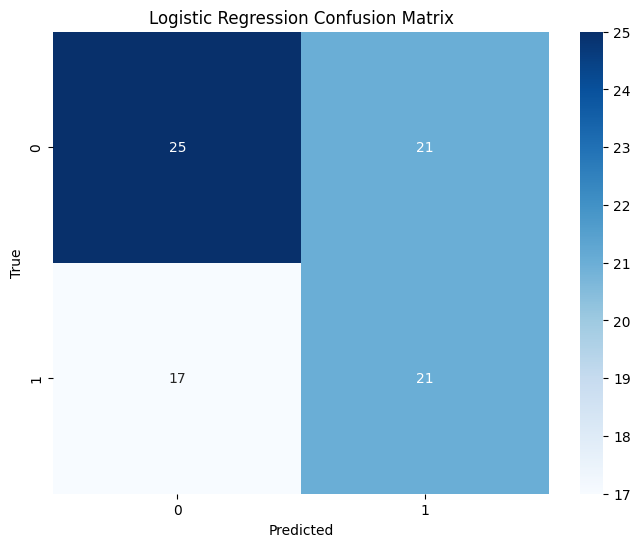

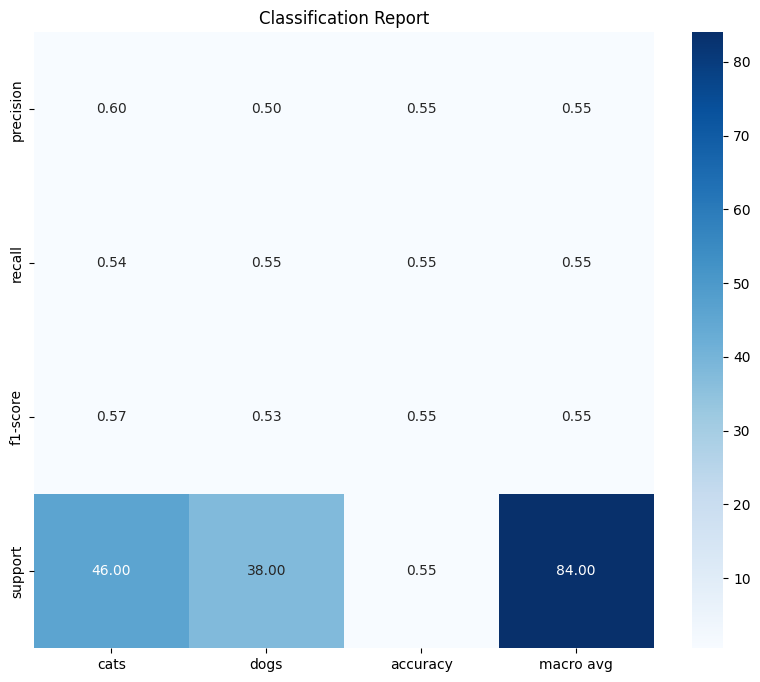

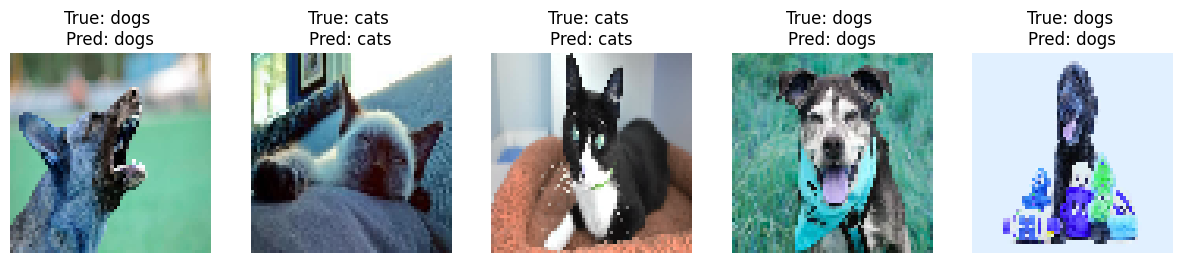

Results for SVM:


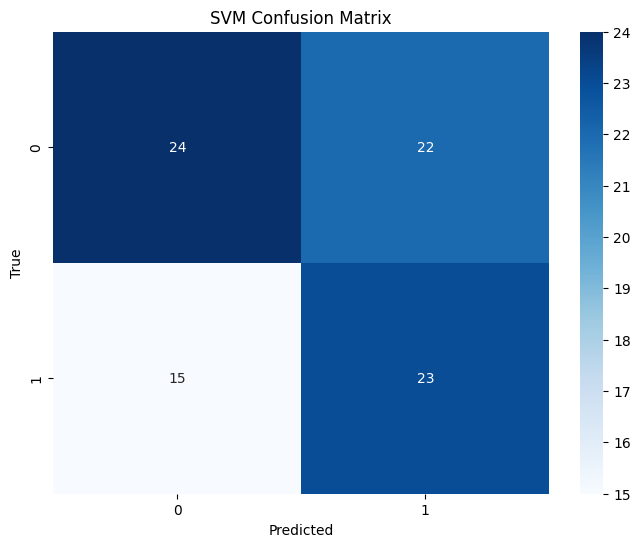

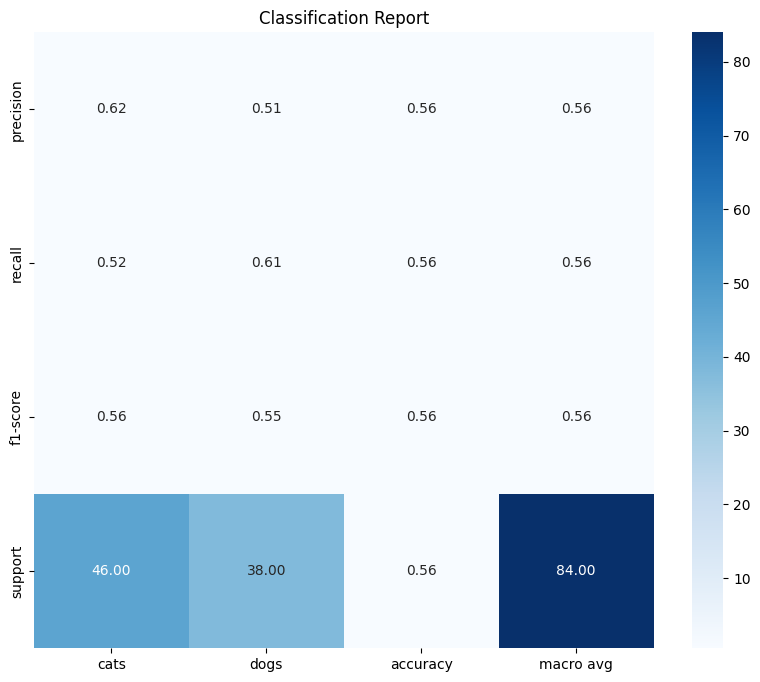

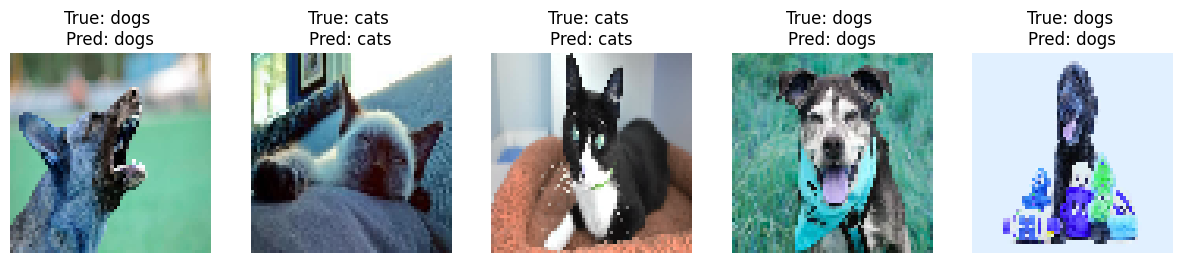

Results for Random Forest:


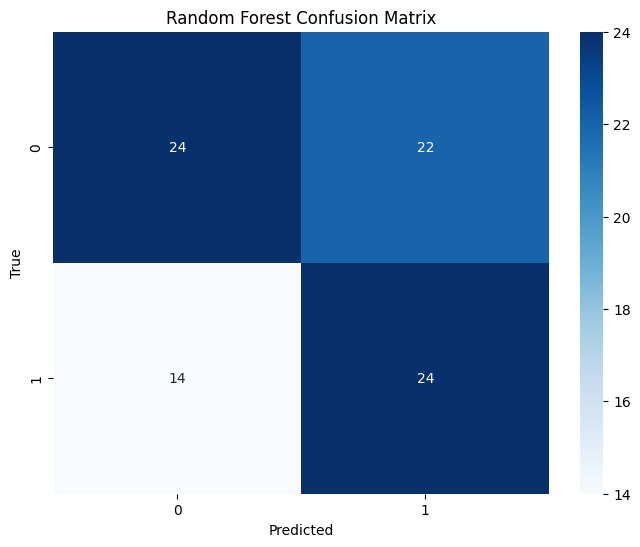

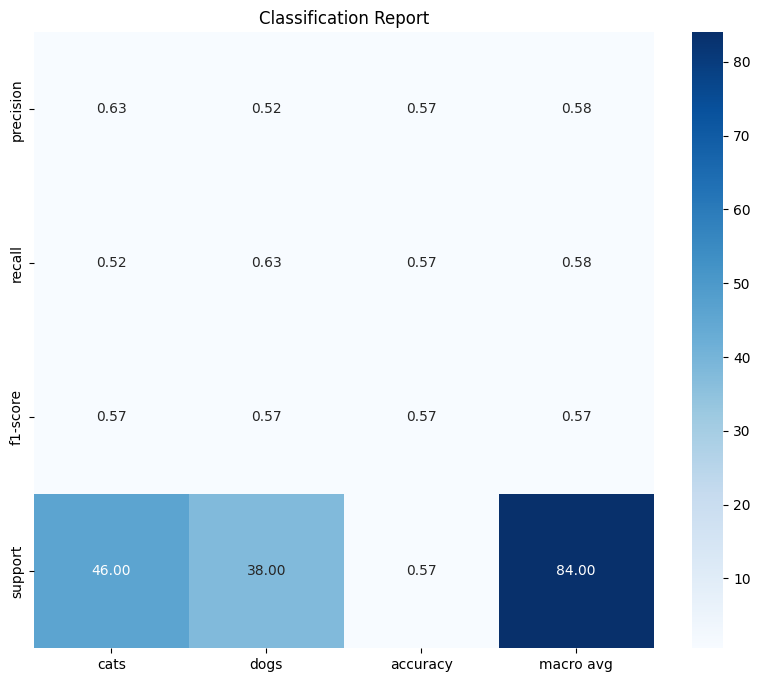

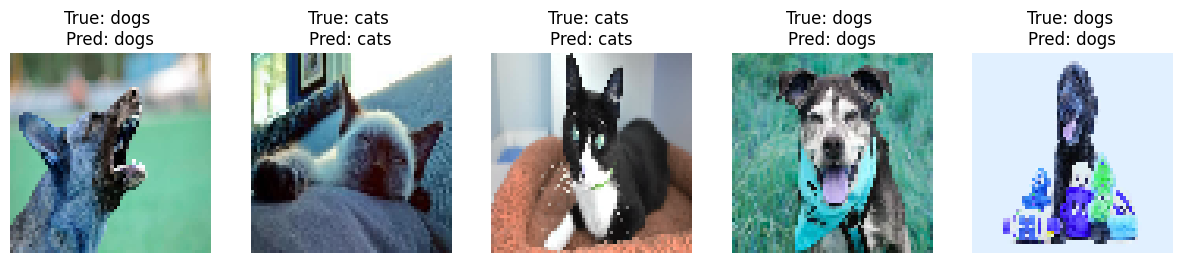

Results for K-Nearest Neighbors:


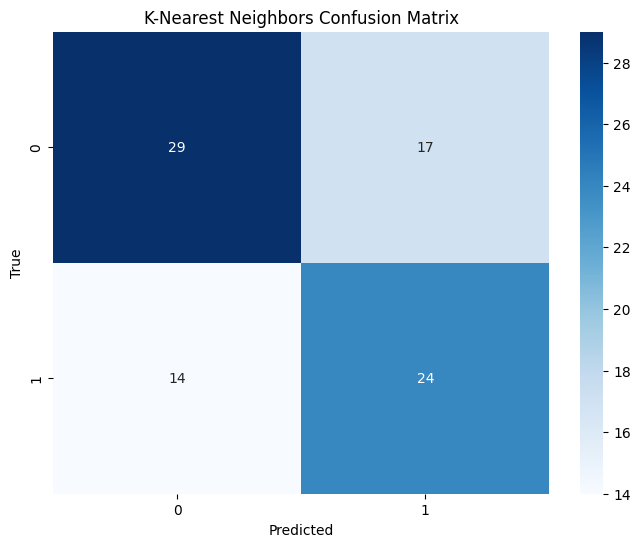

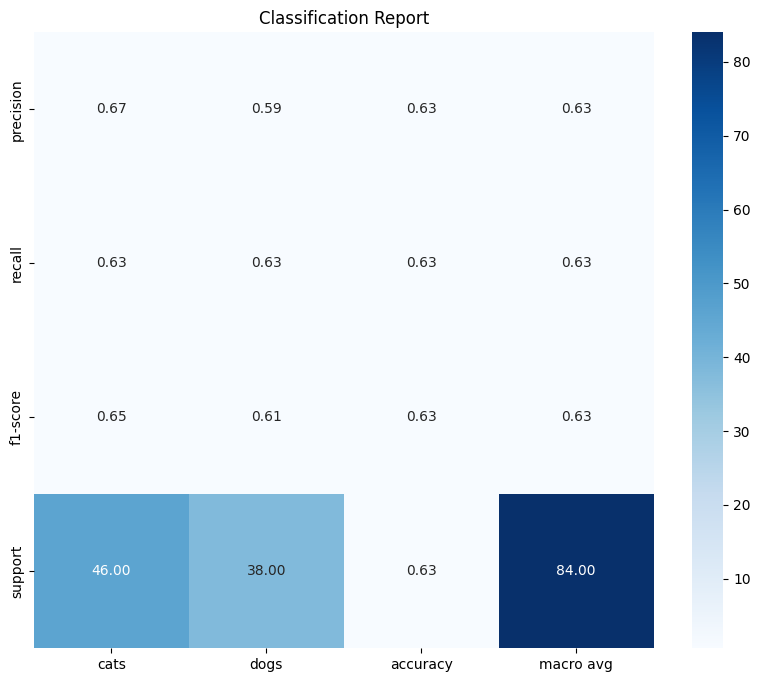

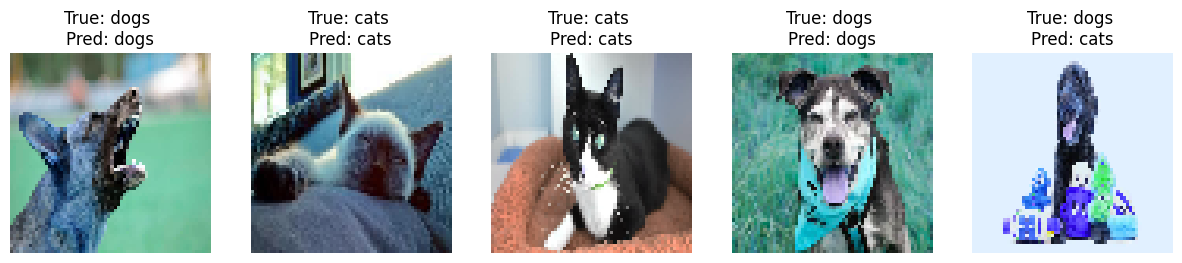

Results for Naive Bayes:


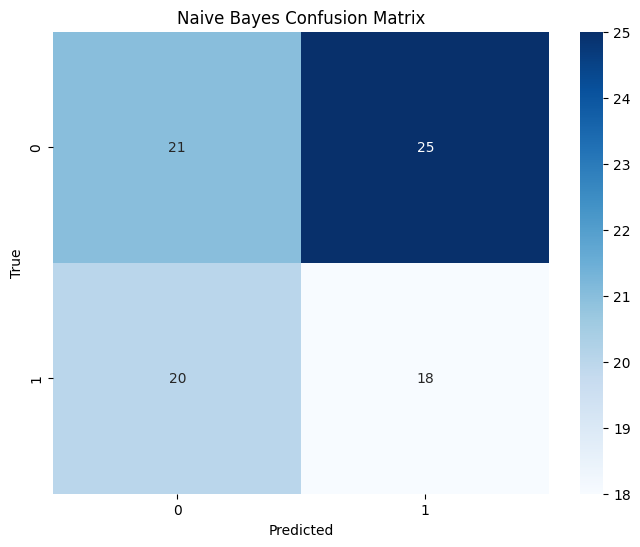

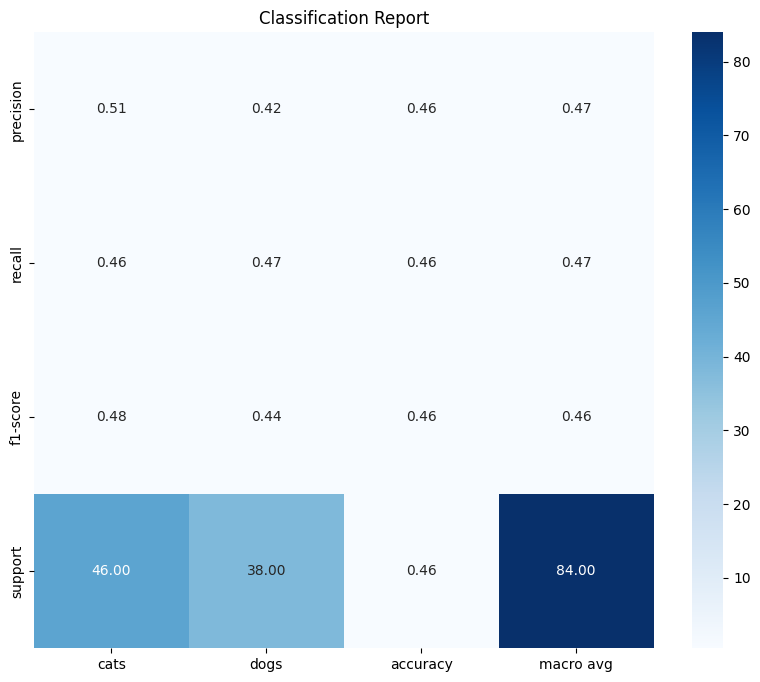

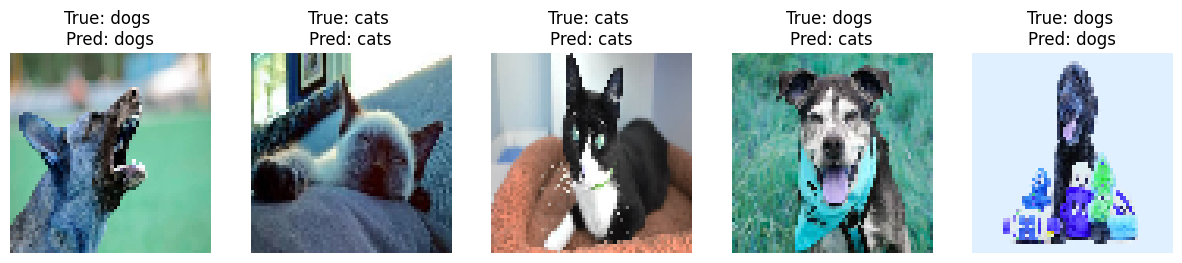

Results for Decision Tree:


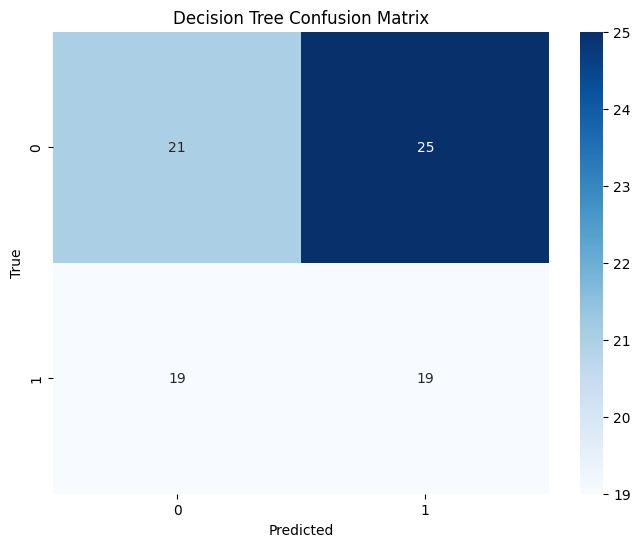

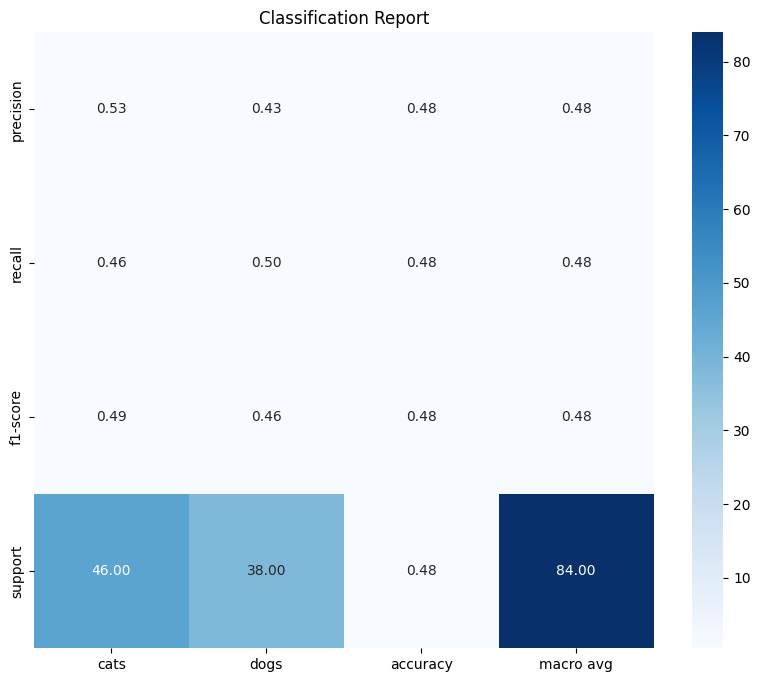

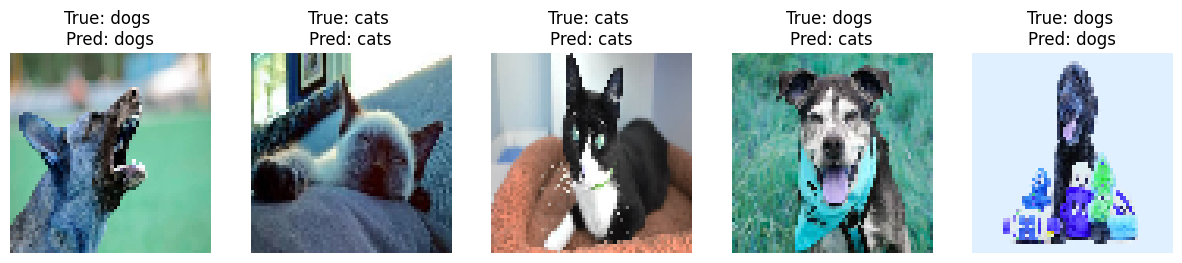

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

logistic_model = LogisticRegression(max_iter=1000)
svm_model = SVC()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()

logistic_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

logistic_preds = logistic_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

def plot_classification_report(y_true, y_pred, labels):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 8))
    sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Classification Report')
    plt.show()

def plot_sample_images(X, y_true, y_pred, labels, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[i].reshape(64, 64, 3))
        plt.title(f"True: {labels[y_true[i]]} \nPred: {labels[y_pred[i]]}")
        plt.axis('off')
    plt.show()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model_predictions = {
    'Logistic Regression': logistic_preds,
    'SVM': svm_preds,
    'Random Forest': rf_preds,
    'K-Nearest Neighbors': knn_preds,
    'Naive Bayes': nb_preds,
    'Decision Tree': dt_preds
}

labels = label_encoder.classes_

for name, preds in model_predictions.items():
    print(f"Results for {name}:")


    preds_encoded = label_encoder.transform(preds)

    valid_labels = np.intersect1d(np.unique(y_test_encoded), np.unique(preds_encoded))


    if len(valid_labels) > 0:
        plot_confusion_matrix(y_test_encoded, preds_encoded, valid_labels, title=f'{name} Confusion Matrix')
    else:
        print(f"No valid labels found for {name} Confusion Matrix")


    if len(np.unique(preds_encoded)) > 0:
        plot_classification_report(y_test_encoded, preds_encoded, labels)
    else:
        print(f"No valid labels found for {name} Classification Report")


    plot_sample_images(X_test, y_test_encoded, preds_encoded, labels)
